In [57]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np
import os

In [88]:
Image_size   = 256
Batch_size   = 32
channels     = 3 #RGB Channels, basically always will be 3. 10 is the number of classes
Epochs       = 10

In [89]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Data",
    shuffle=True,
    image_size = (Image_size,Image_size),
    batch_size = Batch_size
    
)

Found 16011 files belonging to 10 classes.


In [90]:
class_name = dataset.class_names
class_name

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

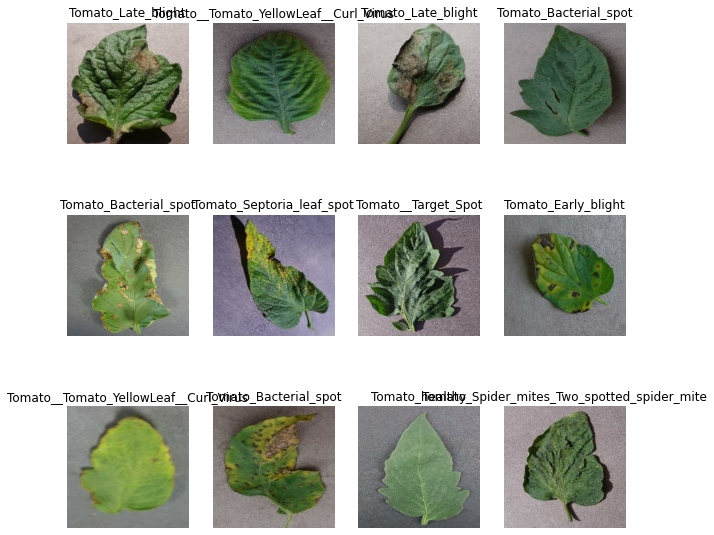

In [91]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_name[label_batch[i]])
        plt.axis("off")

In [92]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
        
    train_size = int(train_split * ds_size)
    val_size   = int(val_split * ds_size)
    
    train_ds   = ds.take(train_size)
    
    val_ds     = ds.skip(train_size).take(val_size)
    test_ds    = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [93]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [94]:
train_ds

<TakeDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>

In [95]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds   = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds  = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [96]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(Image_size, Image_size),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [97]:
data_augumentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [98]:
input_shape  = (Batch_size, Image_size, Image_size, channels)

n_classes = 10

model = models.Sequential([
    resize_and_rescale,
    data_augumentation,
    layers.Conv2D(32, kernel_size = (3,3), 
                  activation='relu', 
                  input_shape = input_shape),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, kernel_size = (3,3), 
                  activation='relu', 
                  input_shape = input_shape),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, kernel_size = (3,3), 
                  activation='relu', 
                  input_shape = input_shape),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, kernel_size = (3,3), 
                  activation='relu', 
                  input_shape = input_shape),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, kernel_size = (3,3), 
                  activation='relu', 
                  input_shape = input_shape),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, kernel_size = (3,3), 
                  activation='relu', 
                  input_shape = input_shape),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
    
])

model.build(input_shape=input_shape)

In [99]:
model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_22 (Sequential)   (32, 256, 256, 3)         0         
_________________________________________________________________
sequential_23 (Sequential)   (32, 256, 256, 3)         0         
_________________________________________________________________
conv2d_90 (Conv2D)           (32, 254, 254, 32)        896       
_________________________________________________________________
max_pooling2d_90 (MaxPooling (32, 127, 127, 32)        0         
_________________________________________________________________
conv2d_91 (Conv2D)           (32, 125, 125, 64)        18496     
_________________________________________________________________
max_pooling2d_91 (MaxPooling (32, 62, 62, 64)          0         
_________________________________________________________________
conv2d_92 (Conv2D)           (32, 60, 60, 64)        

In [100]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [101]:
history = model.fit(
    train_ds,
    epochs = Epochs,
    batch_size = Batch_size,
    verbose = 1,
    validation_data = val_ds
)

Epoch 1/10
400/400 [==============================] - 821s 2s/step - loss: 1.7178 - accuracy: 0.3884 - val_loss: 1.3405 - val_accuracy: 0.5269
Epoch 2/10
400/400 [==============================] - 782s 2s/step - loss: 1.0767 - accuracy: 0.6255 - val_loss: 0.8449 - val_accuracy: 0.7063
Epoch 3/10
400/400 [==============================] - 558s 1s/step - loss: 0.7250 - accuracy: 0.7469 - val_loss: 0.8603 - val_accuracy: 0.6900
Epoch 4/10
400/400 [==============================] - 581s 1s/step - loss: 0.5509 - accuracy: 0.8030 - val_loss: 0.4971 - val_accuracy: 0.8194
Epoch 5/10
400/400 [==============================] - 576s 1s/step - loss: 0.4462 - accuracy: 0.8402 - val_loss: 1.0418 - val_accuracy: 0.7188
Epoch 6/10
400/400 [==============================] - 537s 1s/step - loss: 0.3954 - accuracy: 0.8609 - val_loss: 0.4253 - val_accuracy: 0.8462
Epoch 7/10
400/400 [==============================] - 527s 1s/step - loss: 0.3372 - accuracy: 0.8791 - val_loss: 0.3646 - val_accuracy: 0.8687

In [102]:
scores = model.evaluate(test_ds)

51/51 [==============================] - 53s 482ms/step - loss: 0.3039 - accuracy: 0.8903


In [103]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 400}

In [104]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [105]:
acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']
val_loss = history.history['val_loss']
loss     = history.history['loss']

Text(0.5, 1.0, 'Training and Validation Loss')

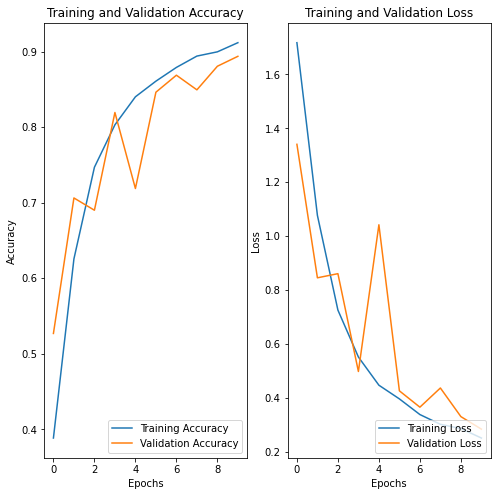

In [106]:
plt.figure(figsize = (8,8))
plt.subplot(1, 2, 1)
plt.plot(range(Epochs), acc, label='Training Accuracy')
plt.plot(range(Epochs), val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(Epochs), loss, label='Training Loss')
plt.plot(range(Epochs), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')

In [107]:
def predict(model, img):
    
    img_array = tf.keras.preprocessing.image.img_to_array(img) #convert image into an image array
    img_array = tf.expand_dims(img_array, 0) #create a batch
    
    prediction = model.predict(img_array)
    
    predicted_class = class_name[np.argmax(prediction[0])]
    confidence = round(100*(np.max(prediction[0])), 2)
    return predicted_class, confidence

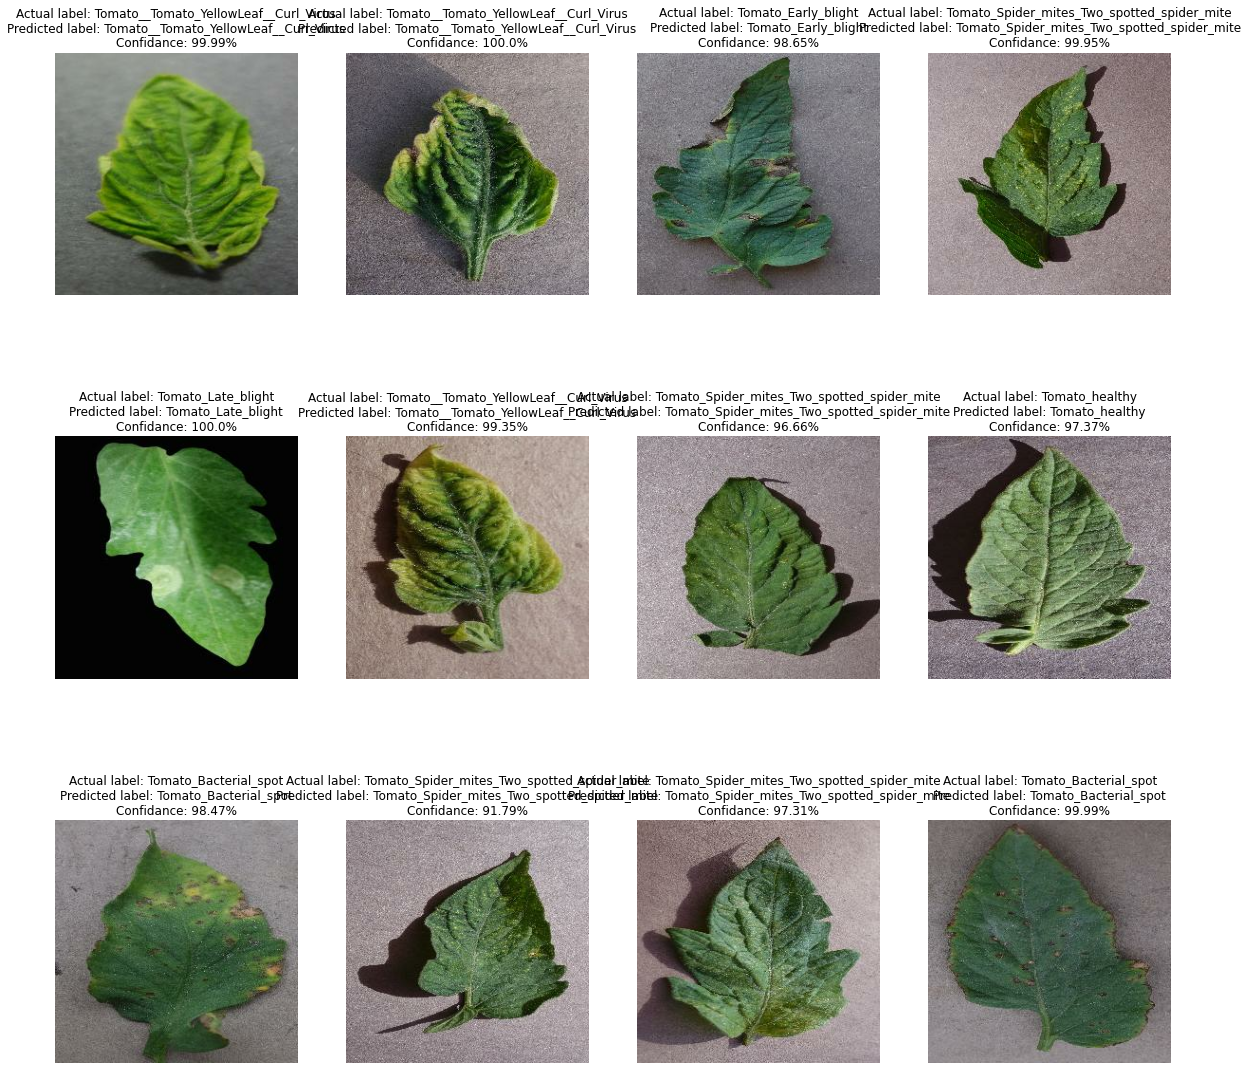

In [108]:
plt.figure(figsize=(20,20))
for images, labels in test_ds.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidance = predict(model, images[i].numpy())
        
        actual_class = class_name[labels[i]]
        
        plt.title('Actual label: '+ actual_class+'\n'+
                  'Predicted label: '+ predicted_class+'\n'+
                  'Confidance: '+str(confidance)+'%')
        plt.axis("off")

In [109]:

model_version = max([int(i) for i in os.listdir('../Models')])+1
model.save(f"../Models/{model_version}")

ValueError: max() arg is an empty sequence

In [110]:
model_version=1
model.save(f"../Models/{model_version}")

INFO:tensorflow:Assets written to: ../Models/1\assets
